## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("Data/fetal_health/fetal_health.csv")
df.shape

(2126, 22)

## Data Exploration (exploratory data analysis or EDA)

In [3]:
df.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

In [4]:
df.tail()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                               79                                   0.2   
2122                               78                                   0.4   
2123                               79                                   0.4   
2124                               78                                   0.4   
2125                               74                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
2121                                                 25       ...   
2122                                                 22       ...   
2123                                                 20       ...   
2124                                                 27       ...   
2125                                                 36       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
2121            137            177                          4   
2122            103            169                          6   
2123            103            170                          5   
2124            103            169                          6   
2125            117            159                          2   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
2121                           0             153             150   
2122                           0             152             148   
2123                           0             153             148   
2124                           0             152             147   
2125                           1             145             143   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
2121               152                   2                   0             2  
2122               151                   3                   1             2  
2123               152                   4                   1             2  
2124               151                   4                   1             2  
2125               145                   1                   0             1  

[5 rows x 22 columns]

A lot of normal status fetuses (to be expected). While there are fewer fetuses with suspect and pathologic statuses, there are enough for us to work with here.

In [5]:
# Let's find out how many of each class there are
df["fetal_health"].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

In [6]:
# % of total
df["fetal_health"].value_counts(1)

1    0.778457
2    0.138758
3    0.082785
Name: fetal_health, dtype: float64

In [7]:
df["fetal_health"].value_counts(1).plot(kind="bar", color=["yellowgreen", "gold", "firebrick"]);

In [8]:
height = (df["fetal_health"].value_counts(1)*100).to_list()
bars = ('Normal', 'Suspect', 'Pathologic')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=('yellowgreen','gold','firebrick'))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, rotation=45, horizontalalignment='right')
 
# remove labels
plt.tick_params(labelbottom='off')

plt.title('Percent of Patients by Fetal Health Status');

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

### No null values!

In [10]:
df.isna().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df.dtypes

baseline_value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_

### Descriptive Statistics

In [12]:
df.describe()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [13]:
len(df["histogram_variance"].value_counts())

# Length tells us that there are 133 different values

133

In [14]:
df["histogram_variance"].value_counts()

1      248
0      187
2      166
3      161
4      108
      ... 
144      1
170      1
182      1
190      1
269      1
Name: histogram_variance, Length: 133, dtype: int64

### More accelerations appears more likely to be associated with Normal FHS

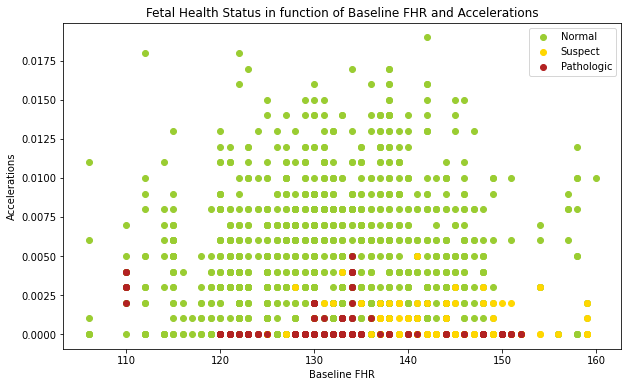

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with normal examples
plt.scatter(df.baseline_value[df.fetal_health==1],
            df.accelerations[df.fetal_health==1],
            c="yellowgreen")
# Scatter with suspect examples
plt.scatter(df.baseline_value[df.fetal_health==2],
            df.accelerations[df.fetal_health==2],
            c="gold")

# Scatter with pathologic examples
plt.scatter(df.baseline_value[df.fetal_health==3],
            df.accelerations[df.fetal_health==3],
            c="firebrick")

# Add some helpful info
plt.title("Fetal Health Status in function of Baseline FHR and Accelerations")
plt.ylabel("Accelerations")
plt.xlabel("Baseline FHR")
plt.legend(["Normal", "Suspect", "Pathologic"]);

### Baseline FHR

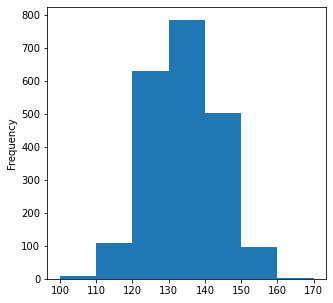

In [16]:
df.baseline_value.plot.hist(bins=np.arange(100,180,10),
                            figsize=(5,5));

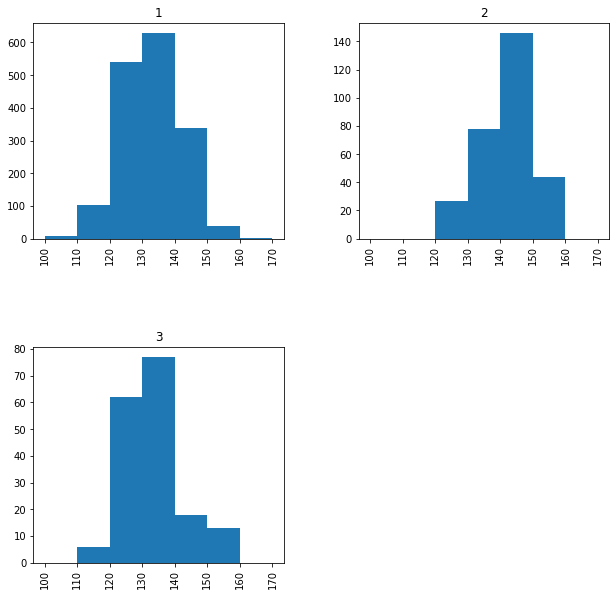

In [17]:
df['baseline_value'].hist(by=df['fetal_health'],
                          bins=np.arange(100,180,10),
                          figsize=(10,10));

### Fetal Health Statuses by Histogram Number of Zeroes

In [18]:
len(df["histogram_number_of_zeroes"].value_counts())

9

In [19]:
pd.crosstab(df.histogram_number_of_zeroes, df.fetal_health)

fetal_health                   1    2    3
histogram_number_of_zeroes                
0                           1243  249  132
1                            301   35   30
2                             91    6   11
3                             16    2    3
4                              1    1    0
5                              2    0    0
7                              0    1    0
8                              0    1    0
10                             1    0    0

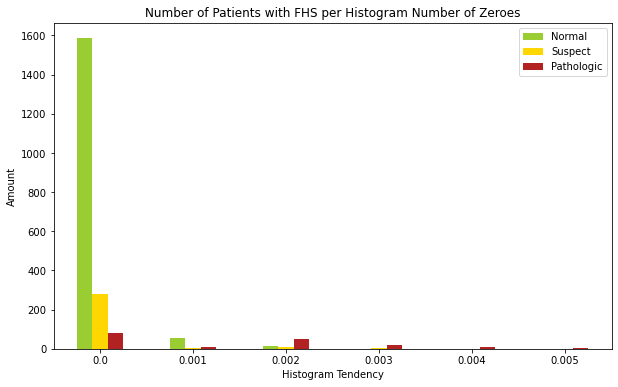

In [20]:
# Make the crosstab more visual
pd.crosstab(df.prolongued_decelerations, df.fetal_health).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["yellowgreen", "gold", "firebrick"])

# Add some communication
plt.title("Number of Patients with FHS per Histogram Number of Zeroes")
plt.xlabel("Histogram Tendency")
plt.ylabel("Amount")
plt.legend(["Normal", "Suspect", "Pathologic"])
plt.xticks(rotation=0);

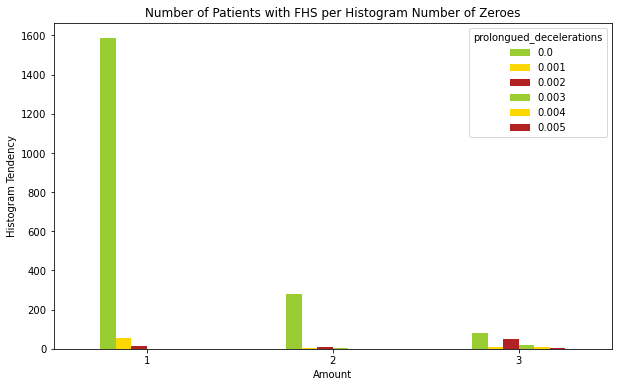

In [21]:
# Make the crosstab more visual
pd.crosstab(df.fetal_health, df.prolongued_decelerations).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["yellowgreen", "gold", "firebrick"])

# Add some communication
plt.title("Number of Patients with FHS per Histogram Number of Zeroes")
plt.ylabel("Histogram Tendency")
plt.xlabel("Amount")
plt.xticks(rotation=0);

### Prolongued Decelerations appears to vary by FHS

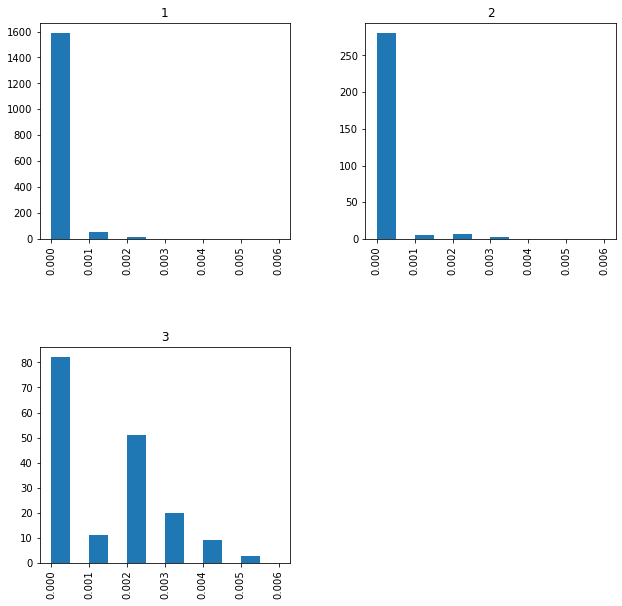

In [22]:
df['prolongued_decelerations'].hist(by=df['fetal_health'],
                                    bins=np.arange(0,0.0065,0.0005),
                                    figsize=(10,10));

### Abnormal Short Term Variability

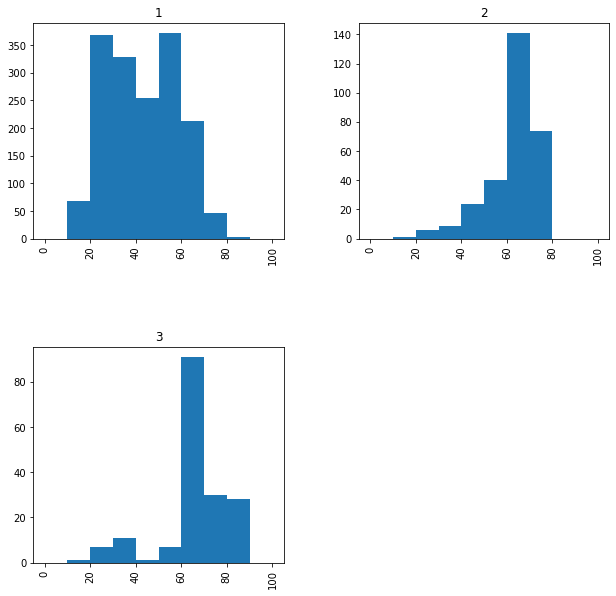

In [23]:
df['abnormal_short_term_variability'].hist(by=df['fetal_health'],
                                    bins=np.arange(0,110,10),
                                    figsize=(10,10));

### % of Time with Abnormal Long Term Variability

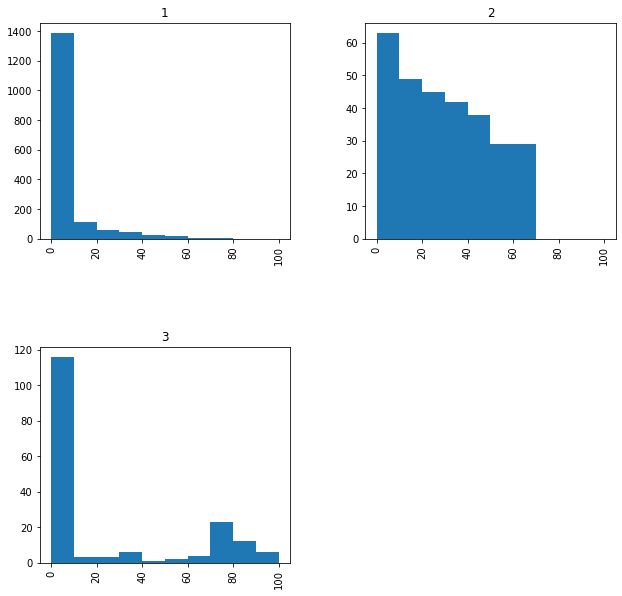

In [24]:
df['percentage_of_time_with_abnormal_long_term_variability'].hist(by=df['fetal_health'],
                                    bins=np.arange(0,110,10),
                                    figsize=(10,10));

### Accelerations

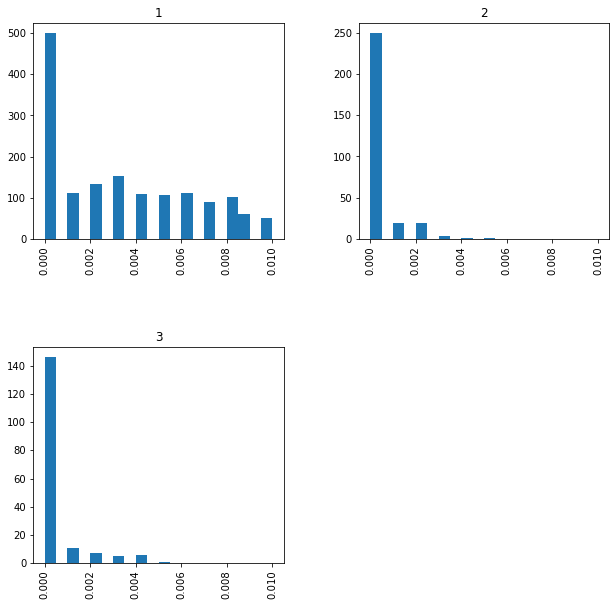

In [25]:
df['accelerations'].hist(by=df['fetal_health'],
                                    bins=np.arange(0,0.0105,0.0005),
                                    figsize=(10,10));

### Correlation Matrix

Looking at the correlation matrix below, the following columns look like our best predictors:
* accelerations
* prolongued_decelerations
* abnormal_short_term_variability
* percentage_of_time_with_abnormal_long_term_variability

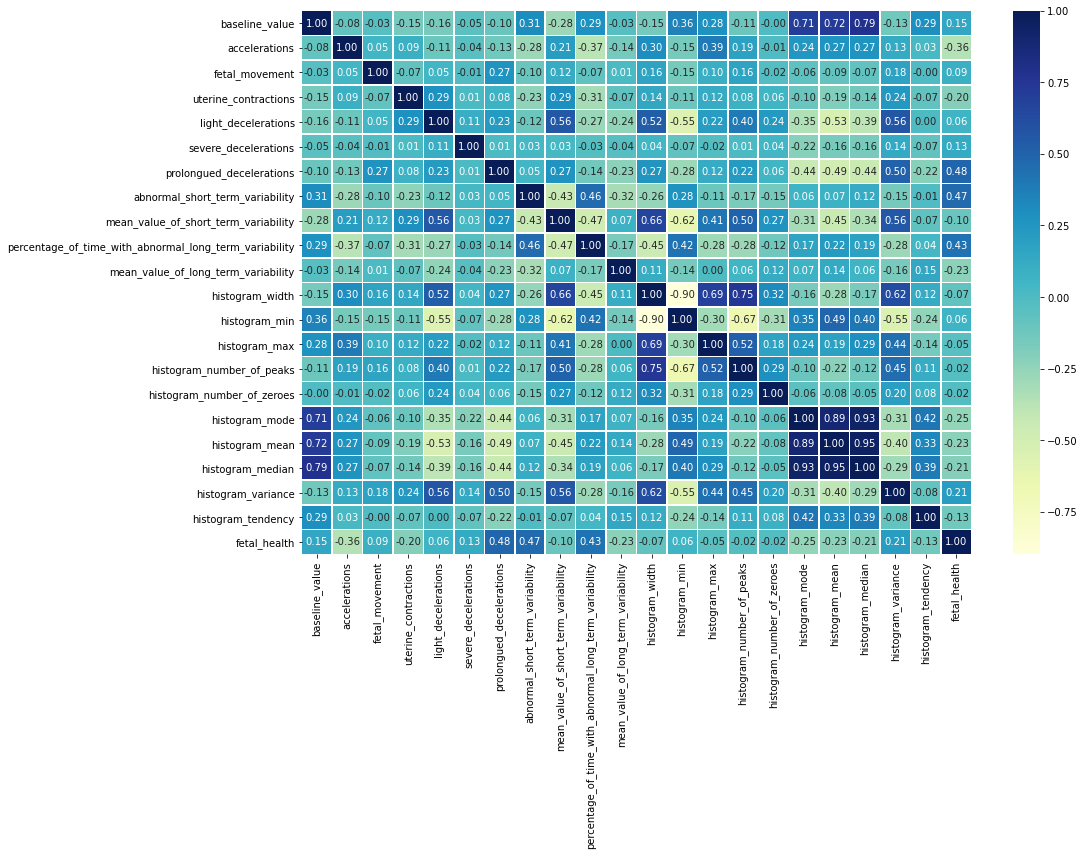

In [26]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [27]:
# Split data into X and y
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

In [28]:
# Split data into Train and Test sets
RANDOM_STATE = 42
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

### Look at distribution of fetal health states in our train and test data

In [29]:
y_train_df = pd.DataFrame(y_train)
y_train_df.value_counts()

fetal_health
1               1322
2                231
3                147
dtype: int64

In [30]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

fetal_health
1               333
2                64
3                29
dtype: int64

### Create Normalized and Standardized Datasets

In [31]:
# Remove Histogram Tendency from our numerical_cols list b/c it is categorical
numerical_cols = list(X_train.columns)
numerical_cols.remove('histogram_tendency')

In [32]:
# Create Normalized Data

from sklearn.preprocessing import MinMaxScaler

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

for col in numerical_cols:

    min_max_scaler = MinMaxScaler()
    scale = min_max_scaler.fit(X_train_norm[[col]])
    X_train_norm[col] = scale.fit_transform(X_train_norm[[col]])
    X_test_norm[col] = scale.transform(X_test_norm[[col]])

In [33]:
# Create Standardized Data

from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

for col in numerical_cols:
    
    scale = StandardScaler().fit(X_train_stand[[col]])
    X_train_stand[col] = scale.transform(X_train_stand[[col]])
    X_test_stand[col] = scale.transform(X_test_stand[[col]])

### Look at Initial Fits of a RandomForestClassifier

After rerunning a few times, it looks like a negligible difference between unaltered data, normalized data, and standardized data

In [34]:
# Unaltered data

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
print('Accuracy:', rf.score(X_test, y_test))
print('F1:', f1_score(y_test, y_preds, average='macro'))
print(confusion_matrix(y_test, y_preds))

Accuracy: 0.9460093896713615
F1: 0.903036686182797
[[327   5   1]
 [ 13  49   2]
 [  1   1  27]]


In [35]:
test = classification_report(y_test, y_preds, target_names=['Normal', 'Suspect', 'Pathologic'])
print(test)

              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       333
     Suspect       0.89      0.77      0.82        64
  Pathologic       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426



In [36]:
test = classification_report(y_test, y_preds, target_names=['Normal', 'Suspect', 'Pathologic'], output_dict=True)
test

{'Normal': {'precision': 0.9589442815249267,
  'recall': 0.9819819819819819,
  'f1-score': 0.970326409495549,
  'support': 333},
 'Suspect': {'precision': 0.8909090909090909,
  'recall': 0.765625,
  'f1-score': 0.823529411764706,
  'support': 64},
 'Pathologic': {'precision': 0.9,
  'recall': 0.9310344827586207,
  'f1-score': 0.9152542372881356,
  'support': 29},
 'accuracy': 0.9460093896713615,
 'macro avg': {'precision': 0.9166177908113392,
  'recall': 0.8928804882468676,
  'f1-score': 0.903036686182797,
  'support': 426},
 'weighted avg': {'precision': 0.9447103933473765,
  'recall': 0.9460093896713615,
  'f1-score': 0.9445233558598942,
  'support': 426}}

In [37]:
test2 = pd.DataFrame(test)

In [38]:
test2.T

precision    recall  f1-score     support
Normal         0.958944  0.981982  0.970326  333.000000
Suspect        0.890909  0.765625  0.823529   64.000000
Pathologic     0.900000  0.931034  0.915254   29.000000
accuracy       0.946009  0.946009  0.946009    0.946009
macro avg      0.916618  0.892880  0.903037  426.000000
weighted avg   0.944710  0.946009  0.944523  426.000000

In [39]:
print(str(test2.T))

              precision    recall  f1-score     support
Normal         0.958944  0.981982  0.970326  333.000000
Suspect        0.890909  0.765625  0.823529   64.000000
Pathologic     0.900000  0.931034  0.915254   29.000000
accuracy       0.946009  0.946009  0.946009    0.946009
macro avg      0.916618  0.892880  0.903037  426.000000
weighted avg   0.944710  0.946009  0.944523  426.000000


In [40]:
test['macro avg']['f1-score']

0.903036686182797

In [41]:
# Normalized data

rf.fit(X_train_norm, y_train)
y_preds_norm = rf.predict(X_test_norm)
print('Accuracy:', rf.score(X_test_norm, y_test))
print('F1:', f1_score(y_test, y_preds_norm, average='macro'))
print(confusion_matrix(y_test, y_preds_norm))

Accuracy: 0.9436619718309859
F1: 0.8922331234590541
[[326   6   1]
 [ 11  51   2]
 [  2   2  25]]


In [42]:
# Standardized data

rf.fit(X_train_stand, y_train)
y_preds_stand = rf.predict(X_test_stand)
print('Accuracy:', rf.score(X_test_stand, y_test))
print('F1:', f1_score(y_test, y_preds_stand, average='macro'))
print(confusion_matrix(y_test, y_preds_stand))

Accuracy: 0.9507042253521126
F1: 0.9055816196683987
[[327   5   1]
 [ 10  52   2]
 [  1   2  26]]


### Trying SVM (Support Vector Machine) classifier

Not as good as RandomForest

In [43]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
svm_predictions=svm_model_linear.predict(X_test)

print('Accuracy:', svm_model_linear.score(X_test, y_test))
print('F1:', f1_score(y_test, svm_predictions, average='macro'))
print(confusion_matrix(y_test, svm_predictions))

Accuracy: 0.8732394366197183
F1: 0.7490966599048879
[[316  15   2]
 [ 23  34   7]
 [  2   5  22]]


### Trying Naive Bayes Classifier

Not as good as RandomForest

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

print('Accuracy:',gnb.score(X_test, y_test))
print('F1:', f1_score(y_test, gnb_predictions, average='macro'))
print(confusion_matrix(y_test, gnb_predictions))

Accuracy: 0.8028169014084507
F1: 0.6908934076900689
[[266  48  19]
 [  5  57   2]
 [  2   8  19]]


### Trying Schotastic Gradient Descent (SGD)

Not as good as RandomForest

In [45]:
from sklearn.linear_model import SGDClassifier

# Fit Model
SGDClf = SGDClassifier(max_iter = 600,
                       tol=1e-3,
                       alpha=10**-5,
                       random_state=RANDOM_STATE)

# Normalized Data
SGDClf.fit(X_train_norm, y_train)
y_preds = SGDClf.predict(X_test_norm)
print('NORMALIZED')
print('Accuracy:', SGDClf.score(X_test_norm, y_test))
print('F1:', f1_score(y_test, y_preds, average='macro'))
print(confusion_matrix(y_test, y_preds))

# Standardized Data
print()
print('STANDARDIZED')
SGDClf.fit(X_train_stand, y_train)
y_preds = SGDClf.predict(X_test_stand)
print('Accuracy:', SGDClf.score(X_test_stand, y_test))
print('F1:', f1_score(y_test, y_preds, average='macro'))
print(confusion_matrix(y_test, y_preds))

NORMALIZED
Accuracy: 0.8427230046948356
F1: 0.7617089844306033
[[281  45   7]
 [  5  56   3]
 [  2   5  22]]

STANDARDIZED
Accuracy: 0.8568075117370892
F1: 0.7340141424366639
[[305  23   5]
 [ 19  39   6]
 [  1   7  21]]


### Trying Logistic Regression and KNN

Not as good as Random Forest

In [46]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter = 10000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    model_scores_f1 = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Make predictions
        y_preds = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        model_scores_f1[name] = f1_score(y_test, y_preds, average='macro')
    return model_scores, model_scores_f1

In [47]:
model_scores, model_scores_f1 = fit_and_score(models, X_train, X_test, y_train, y_test)
print(model_scores)
print(model_scores_f1)

C:\Files\Austin\WGU\Capstone\Task_2\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8943661971830986, 'KNN': 0.8732394366197183, 'Random Forest': 0.9460093896713615}
{'Logistic Regression': 0.800161491045155, 'KNN': 0.7743627706783492, 'Random Forest': 0.9039795378393221}


#### Model Comparison

Looking at the scores for the initial model predictions, each of the models are fairly close to each other, but the Random Forest model looks to be our best bet right now.

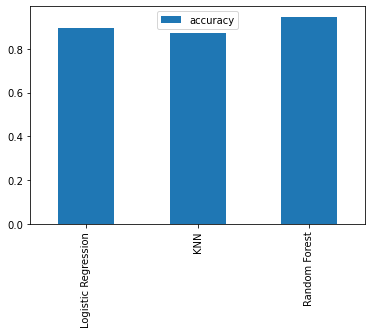

In [48]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

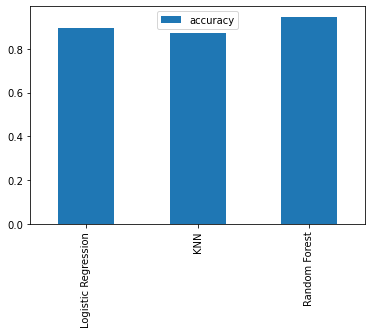

In [49]:
model_compare_f1 = pd.DataFrame(model_scores_f1, index=["F1 Macro"])
model_compare.T.plot.bar();

In [73]:
# Save our baseline Random Forest model

from joblib import dump, load
# dump(rf, filename="baseline.joblib")

In [130]:
# Load our baseline Random Forest model
#rf = load(filename="baseline.joblib")

### Look at other metrics for RandomForest

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf.fit(X_train, y_train)

# Make some predictions
y_preds = rf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds, average='macro')}")
print(f"Recall: {recall_score(y_test, y_preds, average='macro')}")
print(f"F1: {f1_score(y_test, y_preds, average='macro')}")

Classifier metrics on the test set
Accuracy: 95.07%
Precision: 0.9197795373389225
Recall: 0.9032971549135342
F1: 0.9104812432046638


In [136]:
from joblib import dump, load
dump(rf, filename="baseline.joblib")

['baseline.joblib']

### Hyperparameter tuning

In [51]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [52]:
np.mean(train_scores), np.mean(test_scores)

(0.9089411764705883, 0.8881455399061032)

Maximum KNN score on the test data: 89.67%


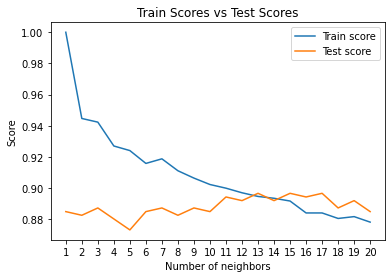

In [53]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score");
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.title("Train Scores vs Test Scores");
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [54]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models,
let's tune them using RandomizedSearchCV...

In [55]:
# Tune LogisticRegression

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                scoring='f1_macro',
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   scoring='f1_macro', verbose=True)

In [56]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [57]:
rs_log_reg.score(X_test, y_test)

0.7815030936893139

Still not a great score

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [58]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           scoring='f1_macro',
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='f1_macro', verbose=True)

In [59]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [60]:
rs_rf.score(X_test, y_test)

0.8953762206695713

This is WORSE than our previous score before tuning hyperparameters

In [61]:
model_scores

{'Logistic Regression': 0.8943661971830986,
 'KNN': 0.8732394366197183,
 'Random Forest': 0.9460093896713615}

## Hyperparameter Tuning with GridSearchCV

Since our RandomForest model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [62]:
# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(460, 910, 50),
           "max_depth": [None],
           "min_samples_split": [2, 8, 14],
           "min_samples_leaf": [1]}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     scoring='f1_macro',
                     verbose=True)

# Fit grid hyperparameter search model for RandomForestClassifier
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 8, 14],
                         'n_estimators': array([460, 510, 560, 610, 660, 710, 760, 810, 860])},
             scoring='f1_macro', verbose=True)

*** Classification Report

In [63]:
gs_rf.best_score_

0.8841894375657257

In [64]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 510}

In [65]:
gs_rf.score(X_test, y_test)

0.9047556336772731

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make some predictions
y_preds = gs_rf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds, average=None)}")
print(f"Recall: {recall_score(y_test, y_preds, average=None)}")
print(f"F1: {f1_score(y_test, y_preds, average=None)}")

# Macros
print("Classifier metrics on the test set")
#print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Macro Precision: {precision_score(y_test, y_preds, average='macro')}")
print(f"Macro Recall: {recall_score(y_test, y_preds, average='macro')}")
print(f"Macro F1: {f1_score(y_test, y_preds, average='macro')}")

Classifier metrics on the test set
Accuracy: 95.07%
Precision: [0.96470588 0.89473684 0.89655172]
Recall: [0.98498498 0.796875   0.89655172]
F1: [0.97473997 0.84297521 0.89655172]
Classifier metrics on the test set
Macro Precision: 0.9186648161987119
Macro Recall: 0.892803903040972
Macro F1: 0.9047556336772731


In [155]:
dump(gs_rf, filename="rf_f1_macro.joblib")

['rf_f1_macro.joblib']

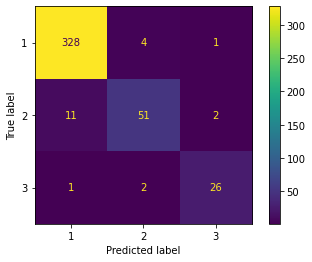

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_rf, X_test, y_test)

In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       333
           2       0.89      0.80      0.84        64
           3       0.90      0.90      0.90        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426



In [69]:
model_scores_f1

{'Logistic Regression': 0.800161491045155,
 'KNN': 0.7743627706783492,
 'Random Forest': 0.9039795378393221}

In [70]:
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
print('Accuracy:', rf.score(X_test, y_test))
print('F1:', f1_score(y_test, y_preds, average='macro'))
print(confusion_matrix(y_test, y_preds))

Accuracy: 0.9530516431924883
F1: 0.9141259777547633
[[327   5   1]
 [ 10  52   2]
 [  1   1  27]]


Our baseline model looks about the same as our tuned model. Maybe slightly better

In [183]:
dump(rf, filename='baseline_rf.joblib')

['baseline_rf.joblib']

# Load Models and Evaluate!

In [74]:
# These first two were from previous runs of this notebook
trained_baseline_macro = load(filename='trained_baseline_macro.joblib')
trained_baseline = load(filename='trained_baseline.joblib')

baseline_rf = load(filename='baseline_rf.joblib')
rf_f1_macro = load(filename='rf_f1_macro.joblib')

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
    
def evaluate_model(model, name, X_test, y_test):
    y_preds = model.predict(X_test)
    print(name)
    print()
    
    print("Classifier metrics on the test set")
    print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds, average=None)}")
    print(f"Recall: {recall_score(y_test, y_preds, average=None)}")
    print(f"F1: {f1_score(y_test, y_preds, average=None)}")

    # Macros
    print("Classifier metrics on the test set")
    #print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
    print(f"Macro Precision: {precision_score(y_test, y_preds, average='macro')}")
    print(f"Macro Recall: {recall_score(y_test, y_preds, average='macro')}")
    print(f"Macro F1: {f1_score(y_test, y_preds, average='macro')}")

    plot_confusion_matrix(model, X_test, y_test)
    
    print()
    print('---')
    print()

Trained Baseline Macro

Classifier metrics on the test set
Accuracy: 95.31%
Precision: [0.96470588 0.91071429 0.9       ]
Recall: [0.98498498 0.796875   0.93103448]
F1: [0.97473997 0.85       0.91525424]
Classifier metrics on the test set
Macro Precision: 0.9251400560224089
Macro Recall: 0.9042981559145352
Macro F1: 0.9133314025234845

---

Trained Baseline

Classifier metrics on the test set
Accuracy: 95.54%
Precision: [0.96755162 0.9122807  0.9       ]
Recall: [0.98498498 0.8125     0.93103448]
F1: [0.97619048 0.85950413 0.91525424]
Classifier metrics on the test set
Macro Precision: 0.9266107747244217
Macro Recall: 0.9095064892478685
Macro F1: 0.9169829485700056

---

Baseline RF

Classifier metrics on the test set
Accuracy: 95.31%
Precision: [0.96735905 0.88333333 0.93103448]
Recall: [0.97897898 0.828125   0.93103448]
F1: [0.97313433 0.85483871 0.93103448]
Classifier metrics on the test set
Macro Precision: 0.9272422888456858
Macro Recall: 0.9127128205791998
Macro F1: 0.91966917359

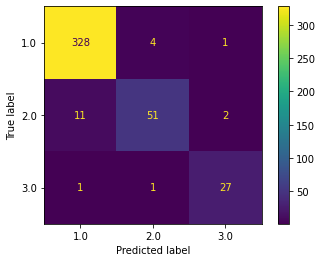

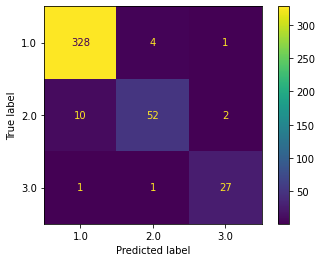

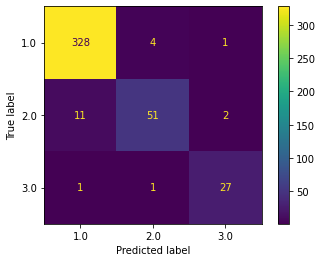

In [76]:
#lb = preprocessing.LabelBinarizer()
#lb.fit([1.0, 2.0, 3.0])
#y_bin = lb.transform(df["fetal_health"].to_numpy())

# Split data into X and y
#X = df.drop("fetal_health", axis=1)
#y = df["fetal_health"]

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,
#                                                    y,
#                                                    test_size=0.2,
#                                                    random_state=RANDOM_STATE)

evaluate_model(trained_baseline_macro, 'Trained Baseline Macro', X_test, y_test)
evaluate_model(trained_baseline, 'Trained Baseline', X_test, y_test)
evaluate_model(baseline_rf, 'Baseline RF', X_test, y_test)
evaluate_model(rf_f1_macro, 'RF F1 Macro', X_test, y_test)

The 'Baseline RF' model looks to be the highest-performing model. While all the models are pretty similar, this one has the highest Macro F1 score. It gets a couple more correct predictions for Suspect (2.0) patients even though it loses a couple correct predictions for Normal (1.0).